# Periodogram 

This notebook aims to perform an analysis of the seasonal component of each time series for each patient.


Is defined as follows 
$$
I(f_j) = \frac{T}{2} \hat{R}_j^2, \quad \text{con } \frac{1}{T} \leq f_j \leq 0.5
$$

Donde:

$$
\hat{R}^2 = \hat{A}^2 + \hat{B}^2
$$

Con:

$$
\hat{A} = \frac{2}{T} \sum_{t=1}^{T} z_t \sin(\omega t); \quad \hat{B} = \frac{2}{T} \sum_{t=1}^{T} z_t \cos(\omega t)
$$

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
data = pd.read_csv('../Data/Preprocessed/HUPA0003P.csv', sep=';')[['time', 'glucose', 'bolus_volume_delivered', 'carb_input']]
data['time'] = pd.to_datetime(data['time'])

In [5]:
z = data['glucose']
T = len(z)
fj = np.linspace(1 / T, 0.5, T // 2 + 1)
I_fj = np.zeros(shape=(fj.shape[0]))

In [9]:
for i, f in enumerate(fj):
    w = 2 * np.pi * f
    t = np.arange(1, T + 1)

    A_hat = (2 / T) * np.sum(z * np.sin(w * t))
    B_hat = (2 / T) * np.sum(z * np.cos(w * t))

    R_hat_sq = A_hat**2 + B_hat**2


    I_fj[i] = (T / 2) * R_hat_sq


print(f"Número de valores no nulos en I_fj: {np.sum(I_fj > 0)}")
print(f"Valor máximo del periodograma: {np.max(I_fj)}")
print(f"Valor mínimo del periodograma: {np.min(I_fj)}")
print(f"Primeros 10 valores del periodograma: {I_fj[:10]}")

Número de valores no nulos en I_fj: 1886
Valor máximo del periodograma: 1180204.4606519
Valor mínimo del periodograma: 0.013463049374407239
Primeros 10 valores del periodograma: [1180204.4606519    55025.264339    137140.58647684  456358.72893513
  661825.80219063   26989.38937844   49204.70525954   45043.03879568
  463178.7249924  1135712.33567927]


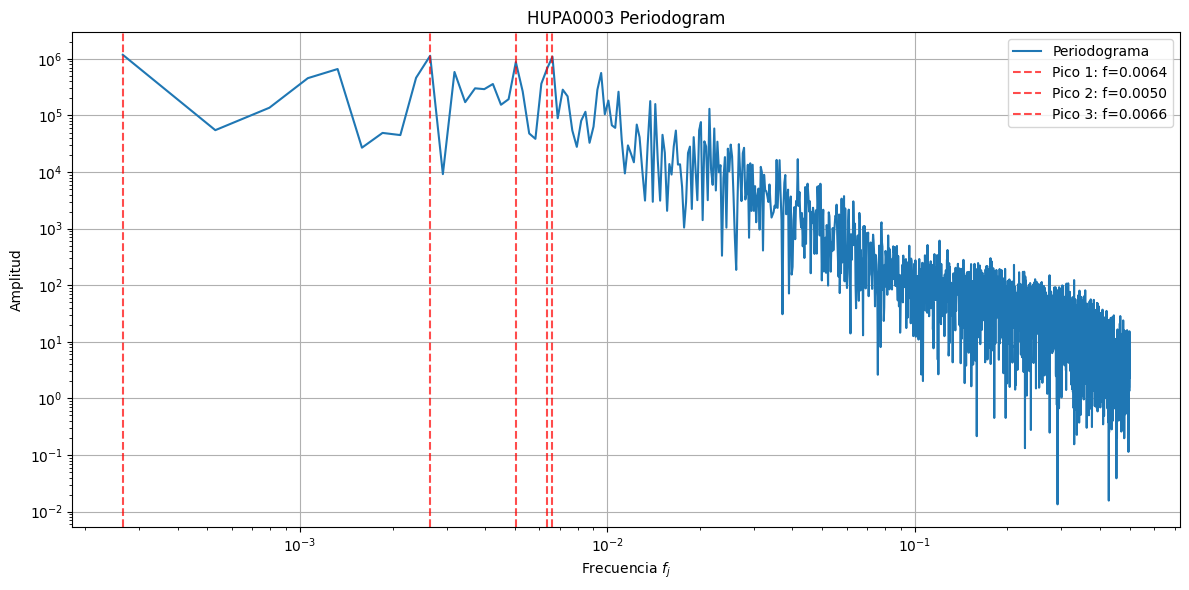

Frecuencias con mayor intensidad espectral:
Pico 1: Frecuencia = 0.006363, Intensidad = 6.69e+05
Pico 2: Frecuencia = 0.005037, Intensidad = 8.78e+05
Pico 3: Frecuencia = 0.006628, Intensidad = 1.09e+06
Pico 4: Frecuencia = 0.002651, Intensidad = 1.14e+06
Pico 5: Frecuencia = 0.000265, Intensidad = 1.18e+06


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(fj, I_fj, label="Periodograma")


n_peaks = 5  
peak_indices = np.argsort(I_fj)[-n_peaks:]  
peak_frequencies = fj[peak_indices]
peak_values = I_fj[peak_indices]

for i, freq in enumerate(peak_frequencies):
    plt.axvline(x=freq, color='red', linestyle='--', alpha=0.7,
                label=f'Pico {i+1}: f={freq:.4f}' if i < 3 else '')

plt.title("HUPA0003 Periodogram")
plt.xlabel("Frecuencia $f_j$")
plt.ylabel("Amplitud")
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("Frecuencias con mayor intensidad espectral:")
for i, (freq, val) in enumerate(zip(peak_frequencies, peak_values)):
    print(f"Pico {i+1}: Frecuencia = {freq:.6f}, Intensidad = {val:.2e}")

/tmp/ipykernel_23563/3441987855.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right', fontsize=8)


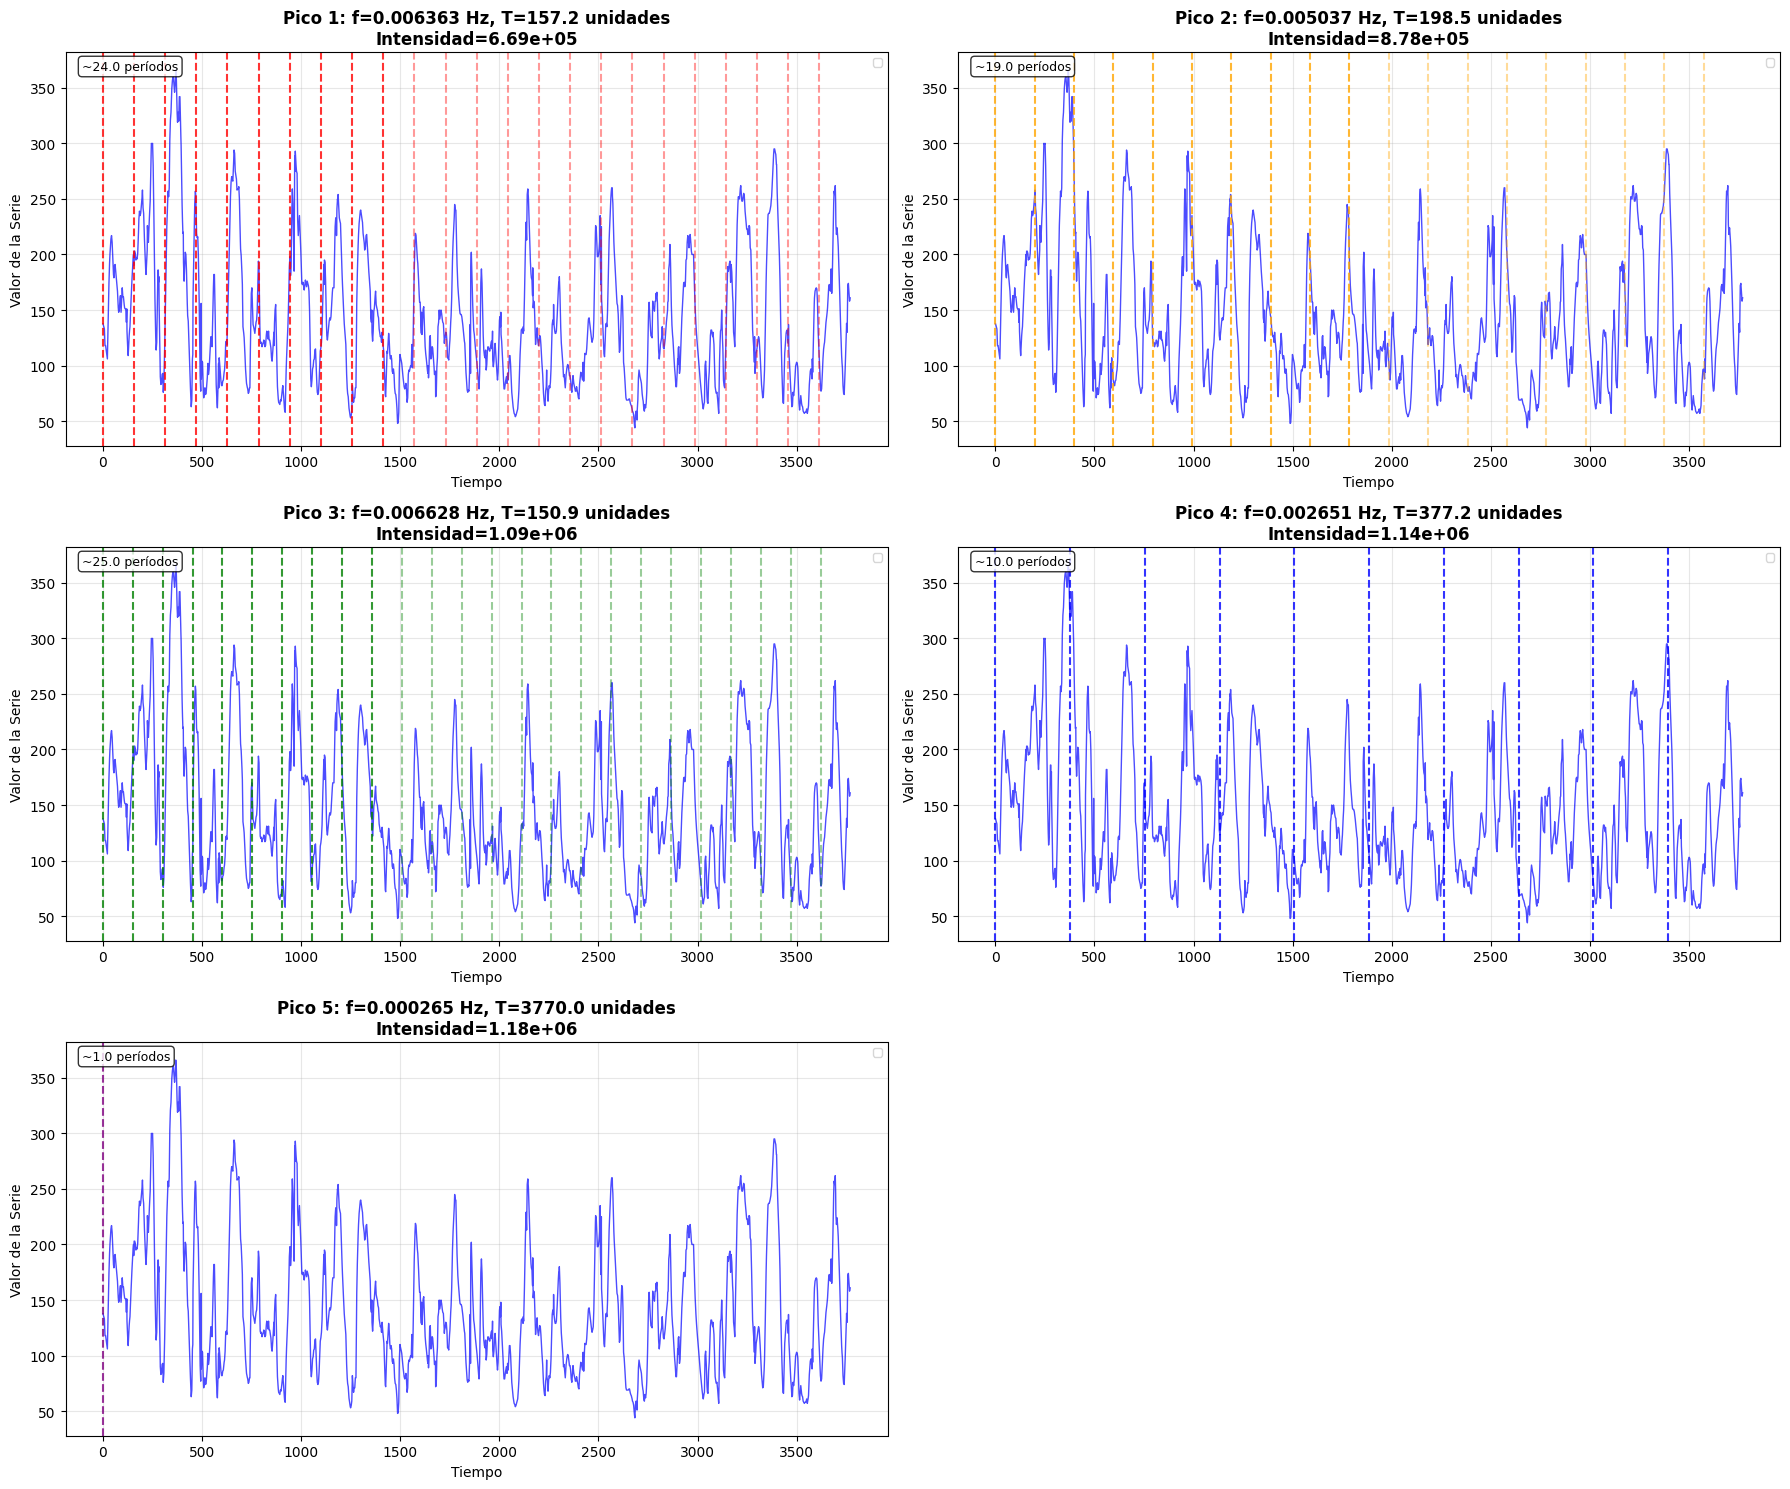

Resumen de las frecuencias dominantes y sus períodos:
Pico 1: f=0.006363 Hz → T=157.2 unidades (24.0 períodos en la serie)
Pico 2: f=0.005037 Hz → T=198.5 unidades (19.0 períodos en la serie)
Pico 3: f=0.006628 Hz → T=150.9 unidades (25.0 períodos en la serie)
Pico 4: f=0.002651 Hz → T=377.2 unidades (10.0 períodos en la serie)
Pico 5: f=0.000265 Hz → T=3770.0 unidades (1.0 períodos en la serie)


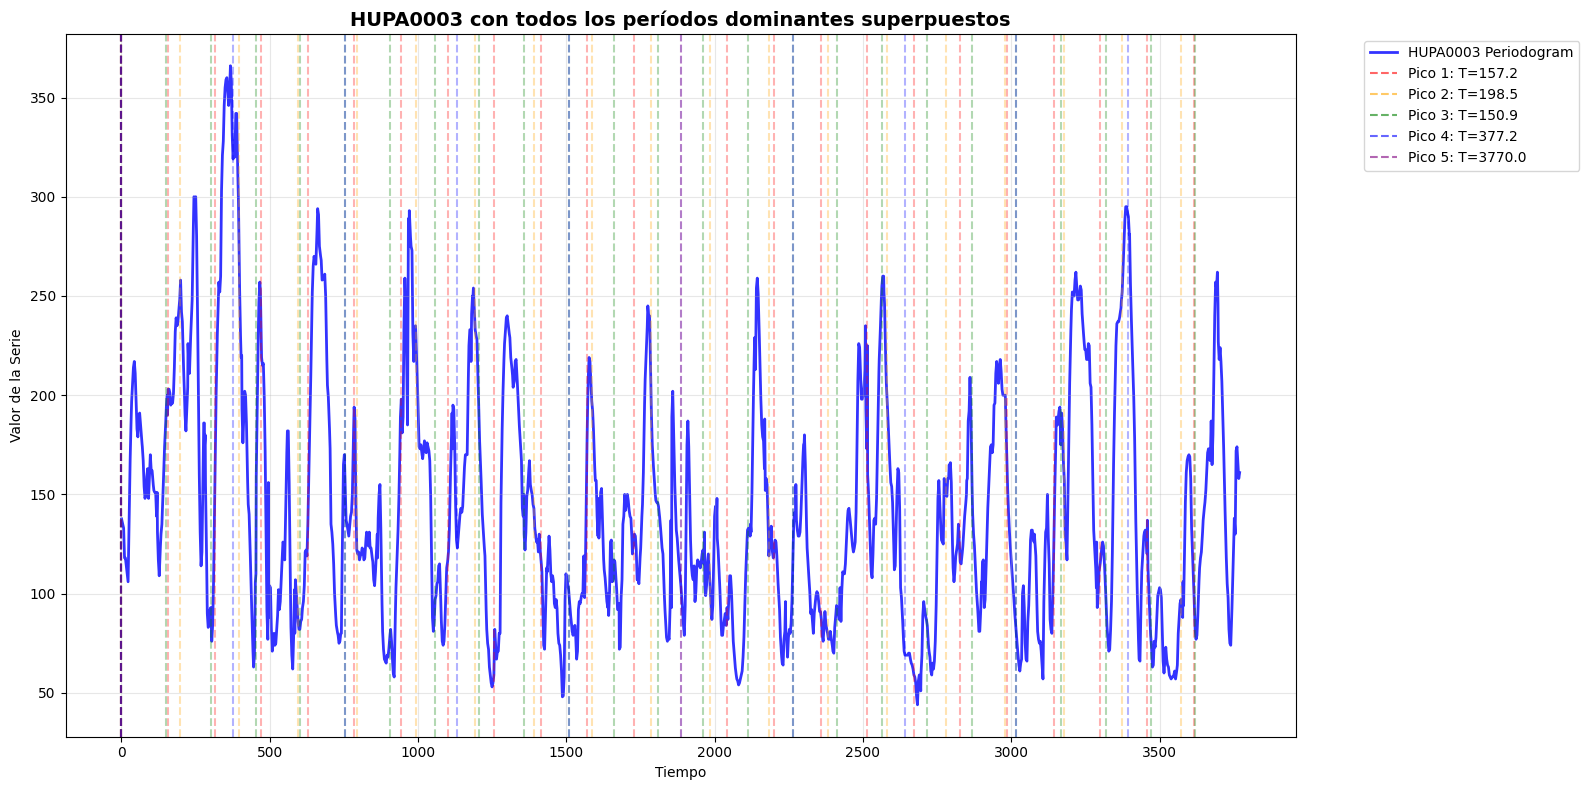

In [17]:
periodos = [1/f for f in peak_frequencies]


tiempo = np.arange(1, T + 1)


fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.flatten()


colores = ['red', 'orange', 'green', 'blue', 'purple']

for i, (freq, periodo, intensidad, color) in enumerate(zip(peak_frequencies, periodos, peak_values, colores)):
    ax = axes[i]


    ax.plot(tiempo, z, 'b-', linewidth=1, alpha=0.7)


    posiciones_verticales = np.arange(0, T, periodo)
    for j, pos in enumerate(posiciones_verticales):
        if pos <= T:
            alpha = 0.8 if j < 10 else 0.4
            ax.axvline(x=pos, color=color, linestyle='--', alpha=alpha, linewidth=1.5)


    ax.set_title(f'Pico {i+1}: f={freq:.6f} Hz, T={periodo:.1f} unidades\nIntensidad={intensidad:.2e}',
                fontsize=12, fontweight='bold')
    ax.set_xlabel('Tiempo')
    ax.set_ylabel('Valor de la Serie')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper right', fontsize=8)


    num_periodos = T / periodo
    ax.text(0.02, 0.98, f'~{num_periodos:.1f} períodos',
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
            fontsize=9)


fig.delaxes(axes[5])

plt.tight_layout()
plt.show()


print("Resumen de las frecuencias dominantes y sus períodos:")
print("="*60)
for i, (freq, periodo, intensidad) in enumerate(zip(peak_frequencies, periodos, peak_values)):
    num_periodos = T / periodo
    print(f"Pico {i+1}: f={freq:.6f} Hz → T={periodo:.1f} unidades ({num_periodos:.1f} períodos en la serie)")
print("="*60)


plt.figure(figsize=(16, 8))
plt.plot(tiempo, z, 'b-', linewidth=2, alpha=0.8, label='HUPA0003 Periodogram', zorder=1)


for i, (freq, periodo, color) in enumerate(zip(peak_frequencies, periodos, colores)):
    posiciones_verticales = np.arange(0, T, periodo)
    for j, pos in enumerate(posiciones_verticales):
        if pos <= T:
            alpha = 0.6 if j == 0 else 0.3
            label = f'Pico {i+1}: T={periodo:.1f}' if j == 0 else ''
            plt.axvline(x=pos, color=color, linestyle='--', alpha=alpha,
                       linewidth=1.5, label=label, zorder=2)

plt.title('HUPA0003 con todos los períodos dominantes superpuestos', fontsize=14, fontweight='bold')
plt.xlabel('Tiempo')
plt.ylabel('Valor de la Serie')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()